5216
624
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 38, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       147584    
                                                                 
 dropout (Dropout)           (None, 36, 36, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                           

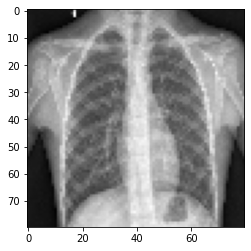

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import models 
from tensorflow.keras import layers





directory1 = 'C:/Users/User/Documents/applied/Final/chest_xray/train'
Catagory=["NORMAL","PNEUMONIA"]

for catagory in Catagory:
    path= os.path.join(directory1,catagory)
    for img in os.listdir(path):
        Training_data=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)

plt.imshow(Training_data,cmap="gray")
plt.show

directory2 = 'C:/Users/User/Documents/applied/Final/chest_xray/test'
Catagory2=["NORMAL","PNEUMONIA"]

for catagory2 in Catagory2:
    path2= os.path.join(directory2,catagory2)
    for img2 in os.listdir(path2):
        testing_data=cv2.imread(os.path.join(path2,img2),cv2.IMREAD_GRAYSCALE)
        break
    break

plt.imshow(testing_data,cmap="gray")
plt.show

Img_size=80
new_Training_data=cv2.resize(Training_data,(Img_size,Img_size))
plt.imshow(new_Training_data,cmap="gray")
plt.show


new_Testing_data=cv2.resize(testing_data,(Img_size,Img_size))
plt.imshow(new_Testing_data,cmap="gray")
plt.show

train_data=[]


def creating_training_data():
      for catagory in Catagory:
            path= os.path.join(directory1,catagory)
            class_num=Catagory.index(catagory)
            for img in os.listdir(path):
                Training_data=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_Training_data=cv2.resize(Training_data,(Img_size,Img_size))
                train_data.append([new_Training_data,class_num])
           

creating_training_data()

print(len(train_data))

import random
random.shuffle(train_data)

X=[]
Y=[]

for features, label in train_data:
    X.append(features)
    Y.append(label)
X = np.array(X)
Y = np.array(Y)
X = X.reshape(-1, 80, 80, 1)




Test_data=[]


def creating_testing_data():
        for catagory2 in Catagory2:
            path2= os.path.join(directory2,catagory2)
            class_num2=Catagory2.index(catagory2)
            for img2 in os.listdir(path2):
                testing_data=cv2.imread(os.path.join(path2,img2),cv2.IMREAD_GRAYSCALE)
                new_Testing_data=cv2.resize(testing_data,(Img_size,Img_size))
                Test_data.append([new_Testing_data,class_num2])

creating_testing_data()

print(len(Test_data))

import random
random.shuffle(Test_data)

x_test=[]
y_test=[]

for features, label in Test_data:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test.reshape(-1, 80, 80, 1)

x_test

y_test





#scale the data
X=X/255.0
x_test=x_test/255.0

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define a sequential model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.6))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.7))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))







# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()
# Train the model

history = model.fit(X, Y, epochs=10,batch_size=32,
                    validation_data=(x_test, y_test))


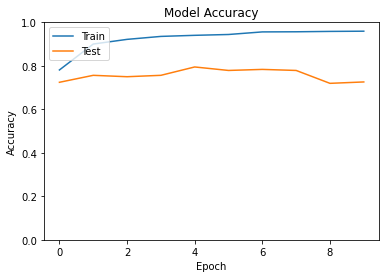

In [3]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<h2>resnet

In [62]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(-1, 80, 80, 1)


In [67]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Define the input shape
input_shape = X_rgb.shape[1:] 

# Create the input layer
inputs = tf.keras.Input(shape=input_shape)

# Load the pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Pass the inputs through the base ResNet50 model
x1 = base_model(inputs)

x1 = tf.keras.layers.GlobalMaxPooling2D()(x1)


# Add a fully-connected layer with the desired number of units
num_units = 256  # Replace with your desired number of units
x1 = Dense(num_units, activation='relu')(x1)

# Add the final output layer with the desired number of classes
num_classes = 1  # Replace with your desired number of output classes
outputs = Dense(num_classes, activation='sigmoid')(x1)

# Create the model with inputs and outputs
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_max_pooling2d_2 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_26 (Dense)            (None, 256)               524544    
                                                                 
 dense_27 (Dense)            (None, 1)                 257       
                                                                 
Total params: 24,112,513
Trainable params: 24,059,393
Non-trainable params: 53,120
__________________________________________

In [68]:
x = base_model.predict(X_rgb)


163/163 [==============================] - 29s 176ms/step


In [65]:
X = X.reshape(-1, 80, 80, 1)

In [66]:
X_rgb = np.repeat(X, 3, axis=-1)

(5216, 80, 80, 3)

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history2 = model.fit(X_rgb, Y, epochs=12,batch_size=13,
                    validation_data=(x_test_rgb, y_test))
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_rgb, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)



Epoch 1/12
402/402 [==============================] - 234s 579ms/step - loss: 0.0819 - accuracy: 0.9724 - val_loss: 0.4075 - val_accuracy: 0.8301
Epoch 2/12
402/402 [==============================] - 240s 597ms/step - loss: 0.0716 - accuracy: 0.9760 - val_loss: 1.1152 - val_accuracy: 0.7516
Epoch 3/12
402/402 [==============================] - 241s 600ms/step - loss: 0.0623 - accuracy: 0.9778 - val_loss: 0.3997 - val_accuracy: 0.8558
Epoch 4/12
402/402 [==============================] - 245s 610ms/step - loss: 0.0585 - accuracy: 0.9776 - val_loss: 0.7773 - val_accuracy: 0.7532
Epoch 5/12
402/402 [==============================] - 267s 664ms/step - loss: 0.0532 - accuracy: 0.9801 - val_loss: 5.6898 - val_accuracy: 0.6378
Epoch 6/12
402/402 [==============================] - 271s 674ms/step - loss: 0.0622 - accuracy: 0.9762 - val_loss: 1.0423 - val_accuracy: 0.6971
Epoch 7/12
402/402 [==============================] - 269s 670ms/step - loss: 0.0626 - accuracy: 0.9762 - val_loss: 2.9196 -

In [8]:
x_test_rgb = np.repeat(x_test, 3, axis=-1)


In [9]:
x_test_rgb.shape

(624, 80, 80, 3)

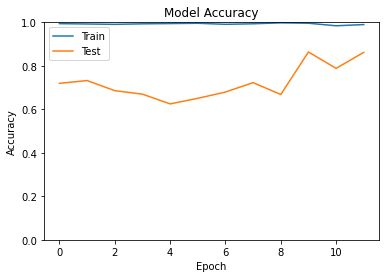

In [22]:
# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<h2> DNN

In [50]:
import tensorflow as tf
from tensorflow.keras import layers

model_3 = Sequential([
    Flatten(input_shape=X.shape[1:]),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
model_3.fit(X, Y, epochs=10, validation_data=(x_test, y_test),batch_size=15)

# Evaluate the model on the test set
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


Epoch 1/10
348/348 [==============================] - 3s 6ms/step - loss: 0.2956 - accuracy: 0.8827 - val_loss: 0.7257 - val_accuracy: 0.7276
Epoch 2/10
348/348 [==============================] - 2s 6ms/step - loss: 0.1659 - accuracy: 0.9383 - val_loss: 0.7528 - val_accuracy: 0.7468
Epoch 3/10
348/348 [==============================] - 2s 6ms/step - loss: 0.1589 - accuracy: 0.9369 - val_loss: 1.1801 - val_accuracy: 0.6923
Epoch 4/10
348/348 [==============================] - 2s 6ms/step - loss: 0.1325 - accuracy: 0.9496 - val_loss: 0.7964 - val_accuracy: 0.7516
Epoch 5/10
348/348 [==============================] - 2s 6ms/step - loss: 0.1288 - accuracy: 0.9540 - val_loss: 1.5132 - val_accuracy: 0.6795
Epoch 6/10
348/348 [==============================] - 2s 6ms/step - loss: 0.1244 - accuracy: 0.9534 - val_loss: 0.9040 - val_accuracy: 0.7276
Epoch 7/10
348/348 [==============================] - 2s 6ms/step - loss: 0.1293 - accuracy: 0.9496 - val_loss: 0.6851 - val_accuracy: 0.7724
Epoch 